<a href="https://colab.research.google.com/github/insight2action/OSU-DataMining/blob/main/2a_PCA_image_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.decomposition import PCA
from pylab import *
from skimage import data, io, color
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100

In [25]:
url = 'https://drive.google.com/uc?id=1wo-S0xcvZsN0NVAoVlIqMFgbyzcWHrtV'

img_gray = io.imread(url, as_gray=True)

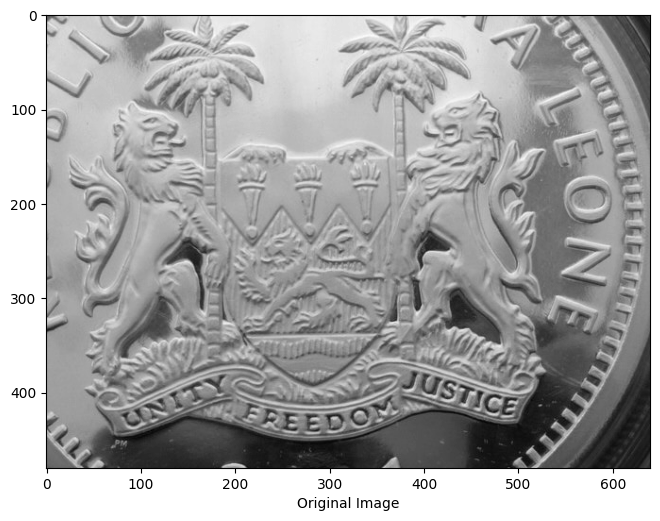

In [26]:
plt.xlabel('Original Image')
plt.imshow(img_gray, cmap='gray')
#plt.imshow(img_gray)
plt.show()

In [27]:
img_gray.shape # (rows, columns)

(480, 640)

In [28]:
#the first record has 640 attribute values
print(img_gray[0])

[0.45938902 0.45154588 0.4240949  0.37647059 0.36470588 0.40392157
 0.41568627 0.36862745 0.46331059 0.57311451 0.66107059 0.69468314
 0.72213412 0.7495851  0.73333333 0.70196078 0.70393294 0.73922706
 0.72746235 0.73138392 0.77452118 0.82942314 0.82942314 0.73922706
 0.71961922 0.75294118 0.76470588 0.75294118 0.75294118 0.76470588
 0.76862745 0.76862745 0.76078431 0.76470588 0.76470588 0.76470588
 0.76862745 0.76862745 0.76862745 0.76862745 0.77254902 0.76470588
 0.76470588 0.76470588 0.77254902 0.77254902 0.76862745 0.76470588
 0.77647059 0.76862745 0.77254902 0.78431373 0.78823529 0.78431373
 0.77647059 0.77844275 0.66079569 0.58236431 0.64118784 0.68040353
 0.67648196 0.69216824 0.68040353 0.70001137 0.65577294 0.65185137
 0.75381216 0.85969451 0.82047882 0.70675333 0.63224353 0.60087098
 0.62440039 0.60871412 0.60479255 0.5857502  0.60535804 0.60927961
 0.55045608 0.53084824 0.55437765 0.5975149  0.59359333 0.57006392
 0.57006392 0.5518549  0.53224706 0.5518549  0.5518549  0.5269

We can think about this image as a matrix of 480 (row) vectors, each of which contains 640 attribute (columnn) values.

In [29]:
# List of number of principal components we're going to try
n_comp = [128, 64, 32, 16, 8, 4]

----
pc shape: 480 x 128
128 principal components
Variance retained 99.15%
Compression Ratio 20.00%


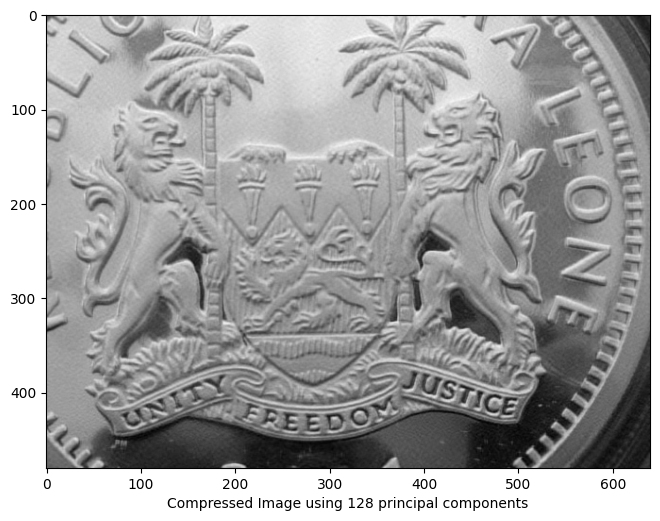

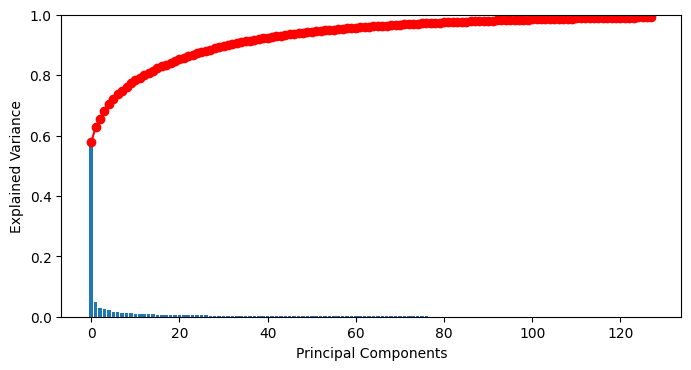

----
pc shape: 480 x 64
64 principal components
Variance retained 96.00%
Compression Ratio 10.00%


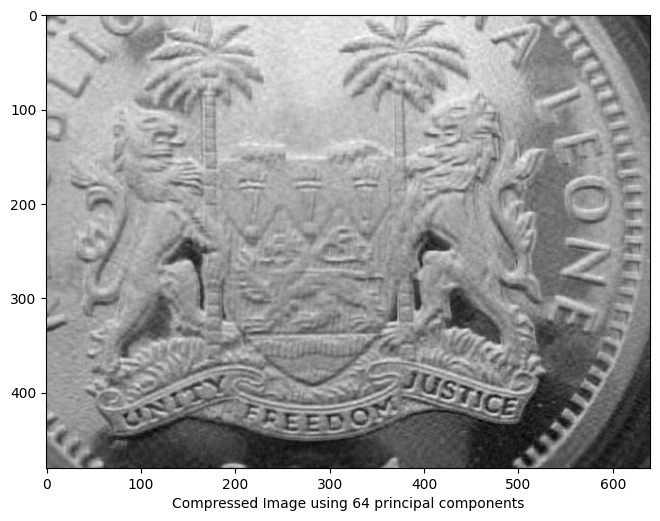

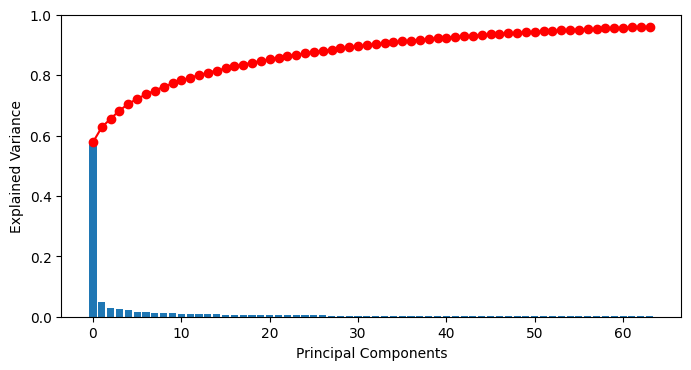

----
pc shape: 480 x 32
32 principal components
Variance retained 89.91%
Compression Ratio 5.00%


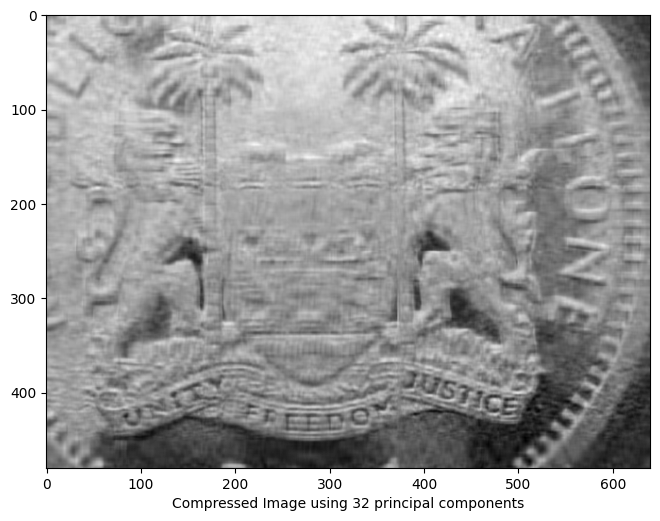

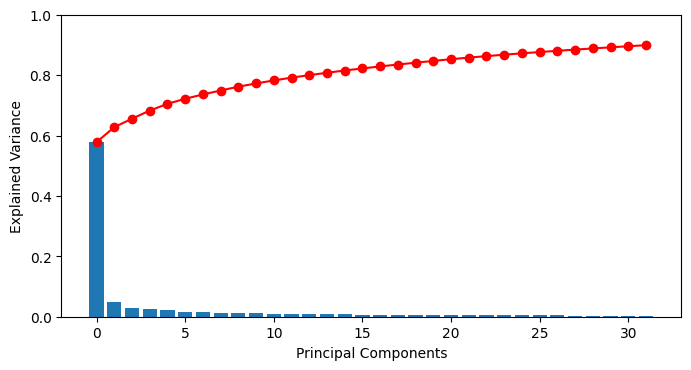

----
pc shape: 480 x 16
16 principal components
Variance retained 82.22%
Compression Ratio 2.50%


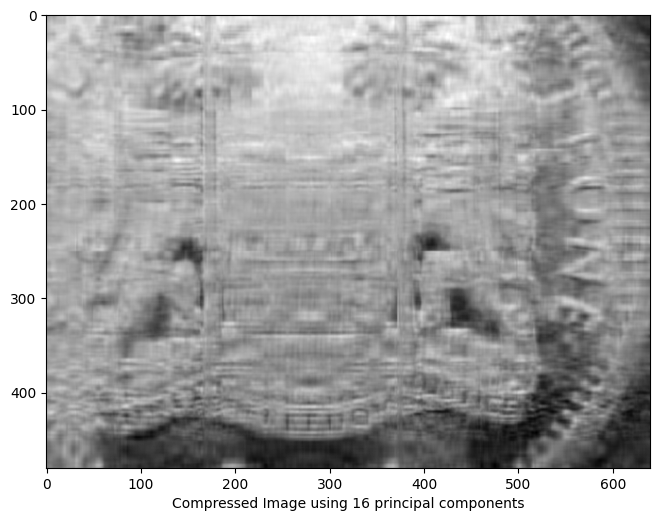

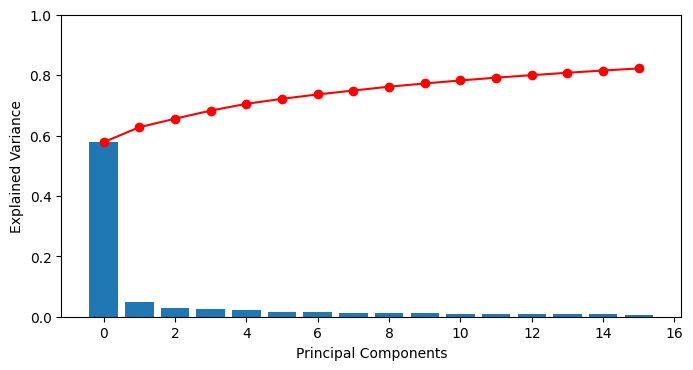

----
pc shape: 480 x 8
8 principal components
Variance retained 74.90%
Compression Ratio 1.25%


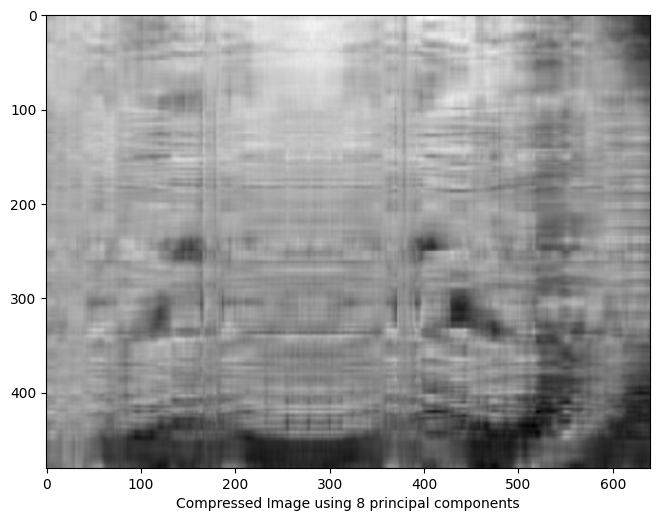

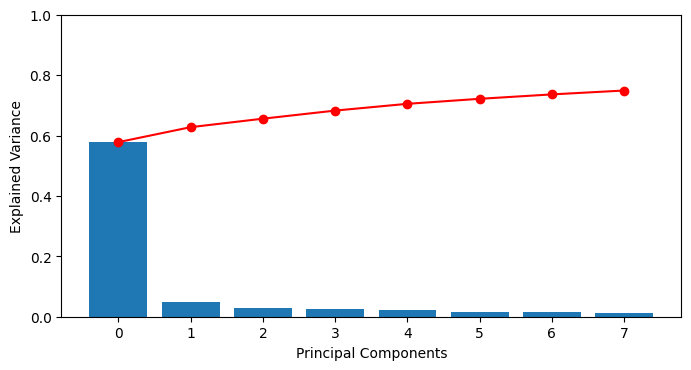

----
pc shape: 480 x 4
4 principal components
Variance retained 68.26%
Compression Ratio 0.62%


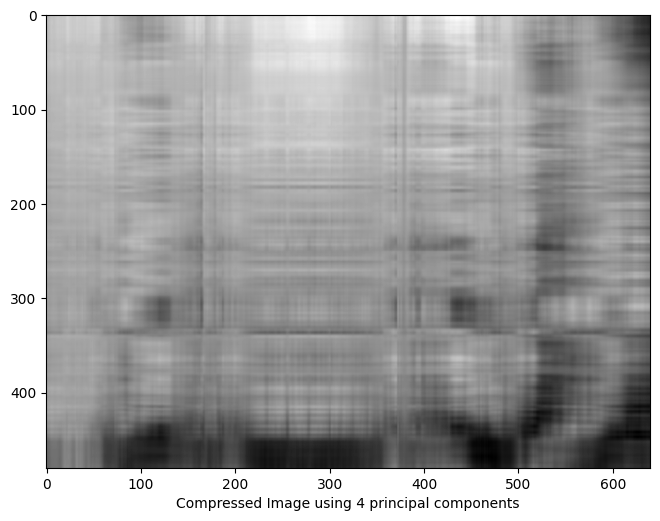

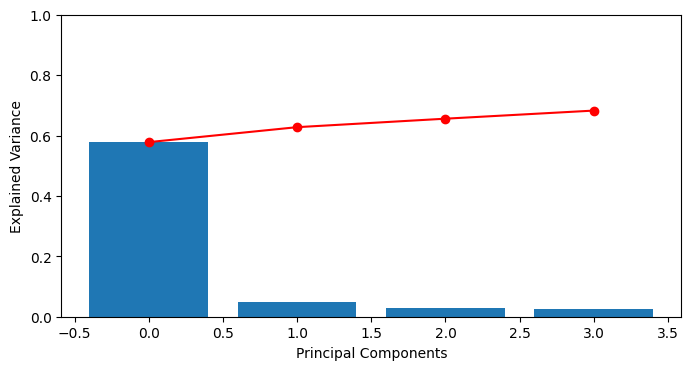

In [30]:
for i in range(len(n_comp)):
    pca = PCA(n_components = n_comp[i])
    pca.fit(img_gray)
    img_gray_pca = pca.fit_transform(img_gray)
    img_gray_restored = pca.inverse_transform(img_gray_pca)
    print('----')
    print('pc shape: %d x %d' % img_gray_pca.shape)
    print('%d principal components' % (n_comp[i]))
    print('Variance retained %.2f%%' % (sum(pca.explained_variance_ratio_) * 100))
    print('Compression Ratio %.2f%%' % (float(size(img_gray_pca)) / size(img_gray) * 100))
    xlabel('Compressed Image using %d principal components' % n_comp[i])
    show(plt.imshow(img_gray_restored, cmap='gray'))

    plt.figure(2, figsize=(8,4), dpi=100)
    xlab = ['PC %s' % j for j in list(range(0, n_comp[i]))]
    x = list(range(0, n_comp[i]))
    y = pca.explained_variance_ratio_
    ycum = y.cumsum()
    #print(x, y)
    plt.bar(x, y)
    plt.plot(x, ycum, c='red', marker='o')
    plt.axis(ymin=0, ymax=1)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance')
    plt.show()

In [31]:
print("First 10 pixel values for the first row of the original image:")
print(img_gray[0,0:10])
print(" ")

print("First 10 pixel values for the first row of the recovered image:")
print(img_gray_restored[0,0:10])

First 10 pixel values for the first row of the original image:
[0.45938902 0.45154588 0.4240949  0.37647059 0.36470588 0.40392157
 0.41568627 0.36862745 0.46331059 0.57311451]
 
First 10 pixel values for the first row of the recovered image:
[0.66717395 0.68098302 0.69272961 0.70198306 0.71436827 0.72786807
 0.72837583 0.72163256 0.71948186 0.72586924]
